- Required steps to follow:
  1. Introduce yourself with  flask-ngrok
  2. Use the saved model by loading it through pickle library
  3. Create a flask app through following code and make zje server accessible globally on HTTP using flask-ngrok


#Introduction

- The flask server creates a server that runs locally on the allocated runtime on google colab as localhost. In order to expose the server to the outside traffic or **to make the server accessible outside the runtime globally on HTTP,** **flask-ngrok** is used.
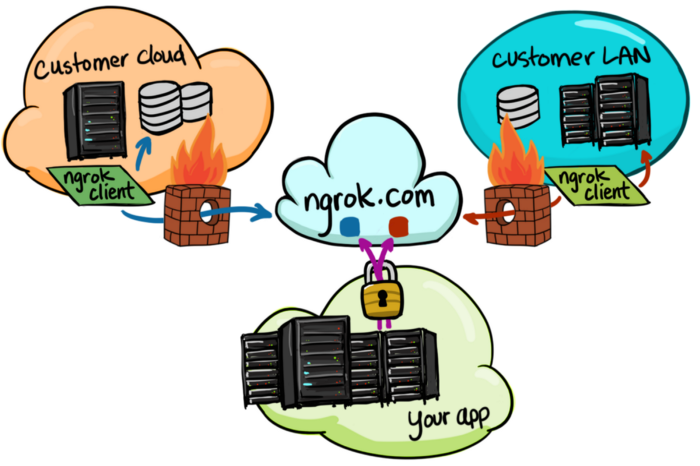

In [1]:
#Install flask-ngrok

!pip install flask-ngrok

In [2]:
#import pickle to load the saved model 

import pickle

model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Machine learning/Classification/Naive Bayes/Kyphosis project/kyphosis_naive_model.pkl','rb'))

In [4]:
#create flask app

import numpy as np
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template,request

#Copy the path of templates and static folders
#Paste those paths in the respective parameters like (...., template_folder= ..,static_folder=...)

app = Flask(__name__, template_folder='/content/drive/MyDrive/Colab Notebooks/Machine learning/Classification/Naive Bayes/Kyphosis project/templates', static_folder='/content/drive/MyDrive/Colab Notebooks/Machine learning/Classification/Naive Bayes/Kyphosis project/static')

run_with_ngrok(app)

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)


    return render_template('home.html', data='Prediction: Kyphhosis is {} '.format(prediction[0]))

if __name__ == '__main__':

  app.run()
  app.debug = True

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c5b6af09f2e4.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [05/May/2021 08:15:14] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2021 08:15:14] "GET /static/styles/style.css HTTP/1.1" 200 -
127.0.0.1 - - [05/May/2021 08:15:15] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [05/May/2021 08:16:03] "POST /predict HTTP/1.1" 200 -


####Run the link which has the ending ".ngrok.io"

- Enter the values and we will get the predicted results.